**Problem definition:**

A UK based company has completed one year of operation . At the end of the year , they want to analyse the entire last year’s purchase data to identify current market status , emerging trends and to gain insights into the nature of their customer base .
The aim of this operation to make appropriate changes in company strategy to increase their business and  consolidate current market position . 
*italicized text*

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

The aim of this project is to harness the power of PySpark to analyse the data and find information that would be beneficial to website owners in better understanding of their website buisness

In [ ]:
!python --version

Python 3.6.9


In [ ]:
# determine the current working directory before start of installation 
!pwd
!wget https://mirrors.estointernet.in/apache/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz

/content
--2020-12-06 07:37:03--  https://mirrors.estointernet.in/apache/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
Resolving mirrors.estointernet.in (mirrors.estointernet.in)... 43.255.166.254, 2403:8940:3:1::f
Connecting to mirrors.estointernet.in (mirrors.estointernet.in)|43.255.166.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 219929956 (210M) [application/octet-stream]
Saving to: ‘spark-3.0.1-bin-hadoop2.7.tgz’

spark-3.0.1-bin-had 100%[===================>] 209.74M  8.77MB/s    in 86s     

2020-12-06 07:38:30 (2.45 MB/s) - ‘spark-3.0.1-bin-hadoop2.7.tgz’ saved [219929956/219929956]



In [ ]:
!tar -xvzf  spark-3.0.1-bin-hadoop2.7.tgz

spark-3.0.1-bin-hadoop2.7/
spark-3.0.1-bin-hadoop2.7/RELEASE
spark-3.0.1-bin-hadoop2.7/examples/
spark-3.0.1-bin-hadoop2.7/examples/src/
spark-3.0.1-bin-hadoop2.7/examples/src/main/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/examples/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/examples/ml/
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/examples/ml/FPGrowthExample.scala
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/examples/ml/GBTExample.scala
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/examples/ml/ALSExample.scala
spark-3.0.1-bin-hadoop2.7/examples/src/main/scala/org/apache/spark/examples/ml/KMeansExample.scala
spark-3.0.1-bin-hadoop2.7/example

In [ ]:
!ls /content/spark-3.0.1-bin-hadoop2.7

!pip install findspark
!pip install pandas
!pip install matplotlib

bin   data	jars	    LICENSE   NOTICE  R		 RELEASE  yarn
conf  examples	kubernetes  licenses  python  README.md  sbin


#Import Libraries

In [ ]:
import os
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("mini project on google colab").getOrCreate()

#Load Dataset

In [ ]:
#note you will have to upload the csv every time you want to run the colab
#https://www.kaggle.com/carrie1/ecommerce-data
df = spark.read.csv("/content/data/data.csv",header=True,inferSchema=True)
df.show(5)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
only showing top 5 rows



In [ ]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



In [ ]:
print((df.count(),len(df.columns)))

(541909, 8)


# **Query 1 : Finding the top 10 countries by the number of product sold**

+---------------+------+
|        Country| count|
+---------------+------+
| United Kingdom|495478|
|        Germany|  9495|
|         France|  8557|
|           EIRE|  8196|
|          Spain|  2533|
|    Netherlands|  2371|
|        Belgium|  2069|
|    Switzerland|  2002|
|       Portugal|  1519|
|      Australia|  1259|
|         Norway|  1086|
|          Italy|   803|
|Channel Islands|   758|
|        Finland|   695|
|         Cyprus|   622|
|         Sweden|   462|
|    Unspecified|   446|
|        Austria|   401|
|        Denmark|   389|
|          Japan|   358|
+---------------+------+



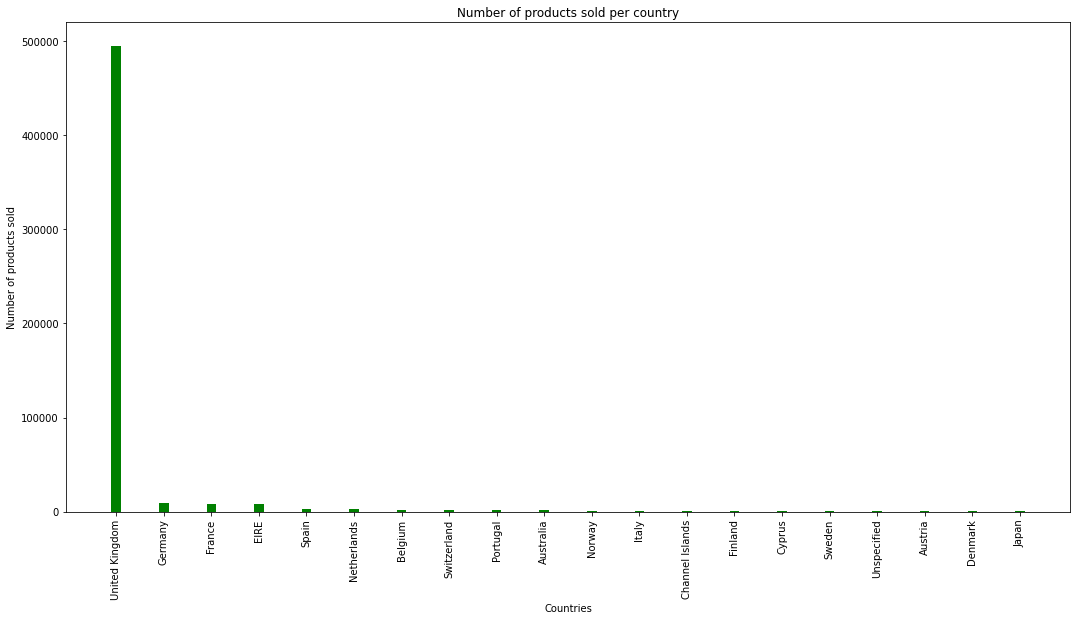

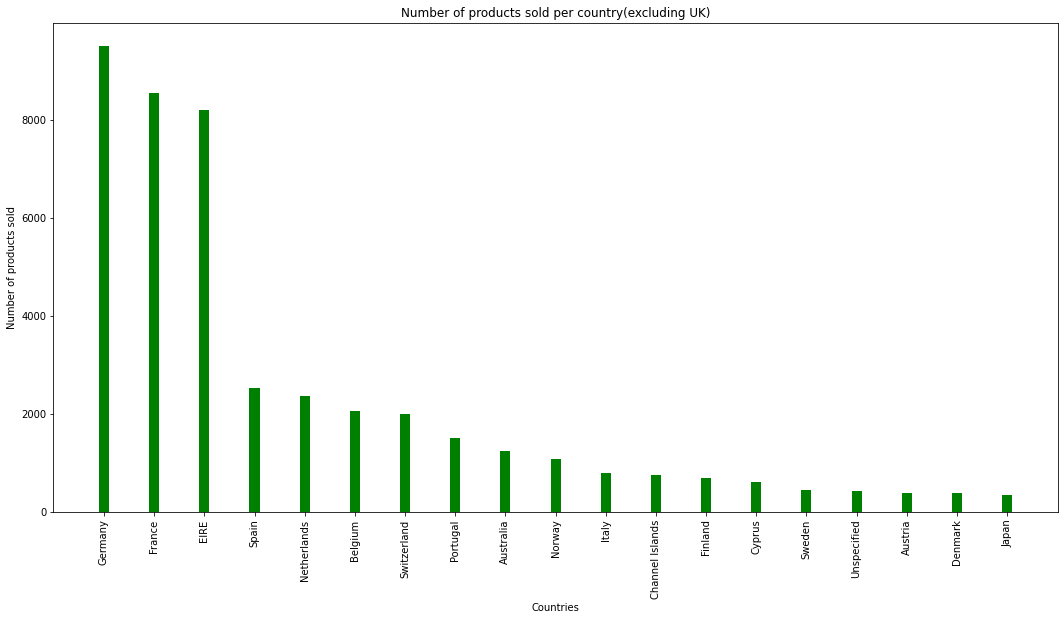

In [ ]:
from pyspark.sql.functions import desc
import matplotlib.pyplot as plt
import pandas
#creating a new dataframe in which all cols other than "Country" col have been removed. Them grouping them by country col and counting it
df1 = df.select(df.Country).groupBy(df.Country).count().sort(desc("count")).limit(20).show()
df1_pandas_x = df.select(df.Country).groupBy(df.Country).count().sort(desc("count")).limit(20).toPandas()["Country"].values.tolist()
df1_pandas_y = df.select(df.Country).groupBy(df.Country).count().sort(desc("count")).limit(20).toPandas()["count"].values.tolist()

#Visualisng the PySpark dataframe
fig = plt.figure(figsize = (18, 9))   
# creating the bar plot 
plt.bar(df1_pandas_x, df1_pandas_y, color ='green',  width = 0.2)   
plt.xlabel("Countries") 
plt.xticks(rotation=90)
plt.ylabel("Number of products sold") 
plt.title("Number of products sold per country") 
plt.show() 


del(df1_pandas_x[0])
del(df1_pandas_y[0])

#Visualisng the PySpark dataframe
fig = plt.figure(figsize = (18, 9))   
# creating the bar plot 
plt.bar(df1_pandas_x, df1_pandas_y, color ='green',  width = 0.2)   
plt.xlabel("Countries") 
plt.xticks(rotation=90)
plt.ylabel("Number of products sold") 
plt.title("Number of products sold per country(excluding UK)")
plt.show() 



# **Query 2: Finding the number of unique customers in the top 10 countries**

+--------------+-----+
|       Country|count|
+--------------+-----+
|United Kingdom| 3951|
|       Germany|   95|
|        France|   88|
|         Spain|   31|
|       Belgium|   25|
|   Switzerland|   22|
|      Portugal|   20|
|         Italy|   15|
|       Finland|   12|
|       Austria|   11|
+--------------+-----+



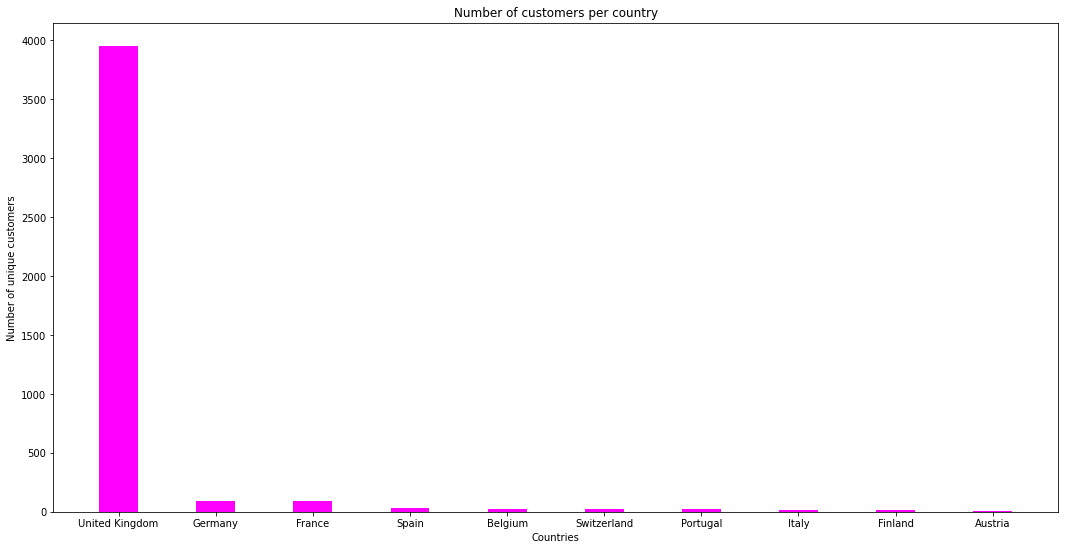

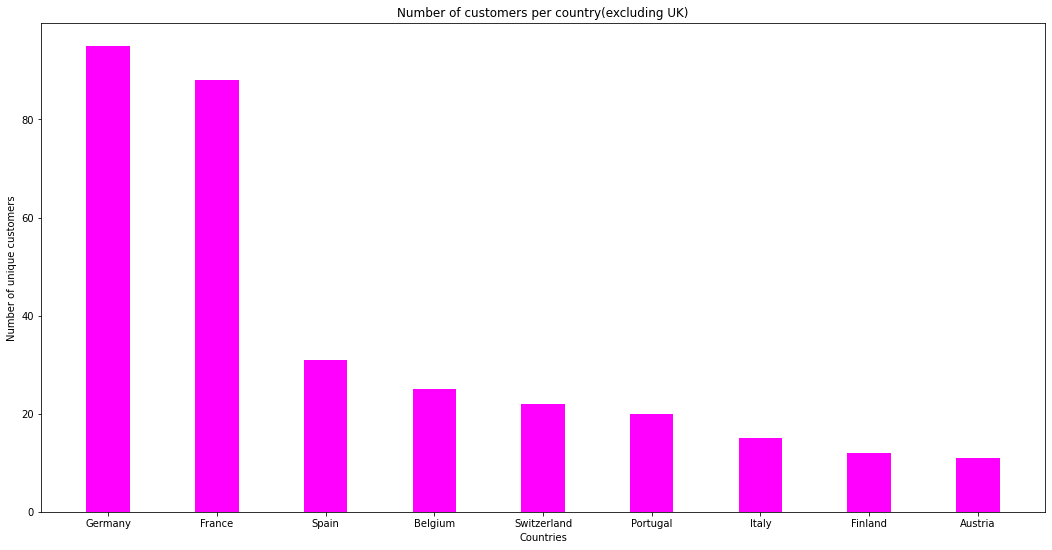

In [ ]:
df2 = df.select(df.Country,df.CustomerID).drop_duplicates().groupBy(df.Country).count().sort(desc("count")).limit(10).show()
df2_pandas_x = df.select(df.Country,df.CustomerID).drop_duplicates().groupBy(df.Country).count().sort(desc("count")).limit(10).toPandas()["Country"].values.tolist()
df2_pandas_y = df.select(df.Country,df.CustomerID).drop_duplicates().groupBy(df.Country).count().sort(desc("count")).limit(10).toPandas()["count"].values.tolist()

#Visualisng the PySpark dataframe
fig = plt.figure(figsize = (18, 9))   
# creating the bar plot 
plt.bar(df2_pandas_x, df2_pandas_y, color ='fuchsia',  width = 0.4)   
plt.xlabel("Countries") 
plt.ylabel("Number of unique customers") 
plt.title("Number of customers per country") 
plt.show()


del(df2_pandas_x[0])
del(df2_pandas_y[0])

#Visualisng the PySpark dataframe
fig = plt.figure(figsize = (18, 9))   
# creating the bar plot 
plt.bar(df2_pandas_x, df2_pandas_y,  width = 0.4, color='fuchsia')   
plt.xlabel("Countries") 
plt.ylabel("Number of unique customers") 
plt.title("Number of customers per country(excluding UK)") 
plt.show() 


# **Query 3: What are the top 20 products (in terms of number of units sold by the company)?**

+----------------------------------+-------------+
|Description                       |sum(Quantity)|
+----------------------------------+-------------+
|WORLD WAR 2 GLIDERS ASSTD DESIGNS |53847        |
|JUMBO BAG RED RETROSPOT           |47363        |
|ASSORTED COLOUR BIRD ORNAMENT     |36381        |
|POPCORN HOLDER                    |36334        |
|PACK OF 72 RETROSPOT CAKE CASES   |36039        |
|WHITE HANGING HEART T-LIGHT HOLDER|35317        |
|RABBIT NIGHT LIGHT                |30680        |
|MINI PAINT SET VINTAGE            |26437        |
|PACK OF 12 LONDON TISSUES         |26315        |
|PACK OF 60 PINK PAISLEY CAKE CASES|24753        |
|VICTORIAN GLASS HANGING T-LIGHT   |23854        |
|ASSORTED COLOURS SILK FAN         |23082        |
|BROCADE RING PURSE                |23053        |
|RED  HARMONICA IN BOX             |21866        |
|JUMBO BAG PINK POLKADOT           |21009        |
|SMALL POPCORN HOLDER              |20116        |
|PAPER CHAIN KIT 50'S CHRISTMAS

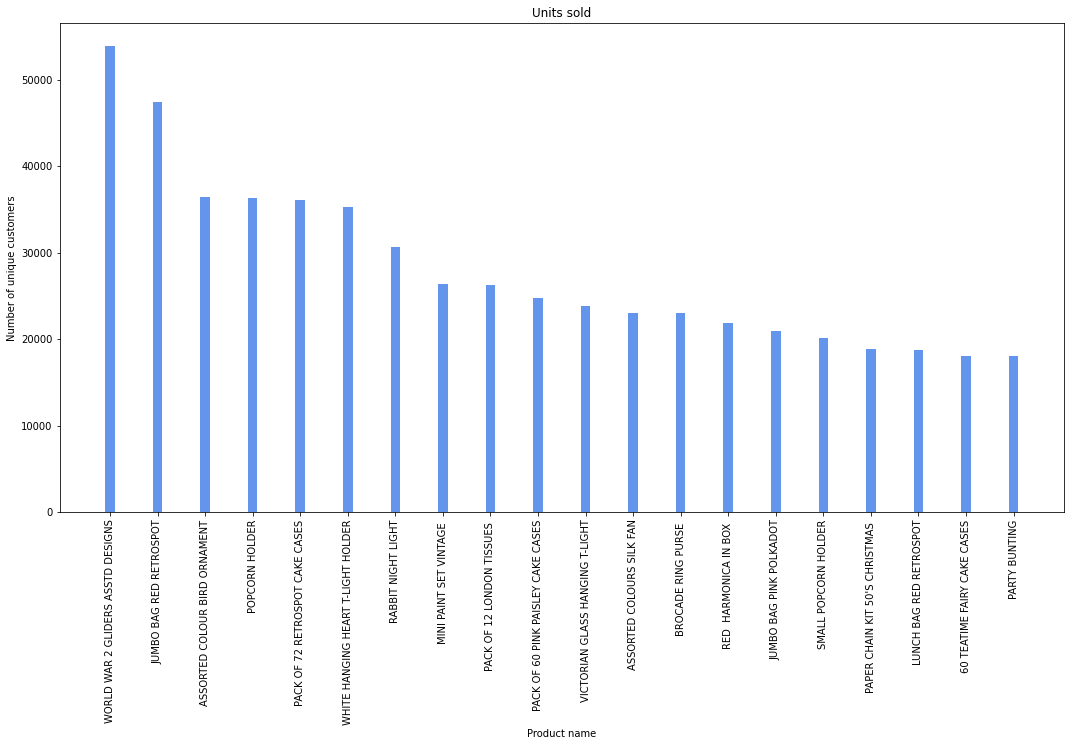

In [ ]:
from pyspark.sql.functions import sum 
df3 = df.select(df.Description,df.Quantity).groupBy(df.Description).agg(sum("Quantity")).sort(desc("sum(Quantity)")).limit(20).show(truncate=False)
df3_pandas_x = df.select(df.Description,df.Quantity).groupBy(df.Description).agg(sum("Quantity")).sort(desc("sum(Quantity)")).limit(20).toPandas()["Description"].values.tolist()
df3_pandas_y = df.select(df.Description,df.Quantity).groupBy(df.Description).agg(sum("Quantity")).sort(desc("sum(Quantity)")).limit(20).toPandas()["sum(Quantity)"].values.tolist()

#Visualisng the PySpark dataframe
fig = plt.figure(figsize = (18, 9))   
# creating the bar plot 
plt.bar(df3_pandas_x, df3_pandas_y, color ='cornflowerblue',  width = 0.2)   
plt.xlabel("Product name") 
plt.xticks(rotation=90)
plt.ylabel("Number of unique customers") 
plt.title("Units sold") 
plt.show() 


# **Query 4: What are the top 20 countries by revenue for the company?**

+---------------+------------------+
|        Country|    sum(TotalBill)|
+---------------+------------------+
| United Kingdom| 8187806.363998687|
|    Netherlands| 284661.5399999992|
|           EIRE| 263276.8199999992|
|        Germany|221698.21000000037|
|         France|197403.90000000037|
|      Australia|137077.26999999987|
|    Switzerland| 56385.35000000011|
|          Spain| 54774.58000000016|
|        Belgium|40910.960000000014|
|         Sweden| 36595.90999999998|
|          Japan|35340.619999999995|
|         Norway| 35163.46000000001|
|       Portugal|29367.019999999953|
|        Finland|22326.739999999994|
|Channel Islands| 20086.28999999999|
|        Denmark| 18768.13999999999|
|          Italy|16890.509999999995|
|         Cyprus|12946.289999999994|
|        Austria|10154.319999999996|
|      Hong Kong|10117.039999999997|
+---------------+------------------+



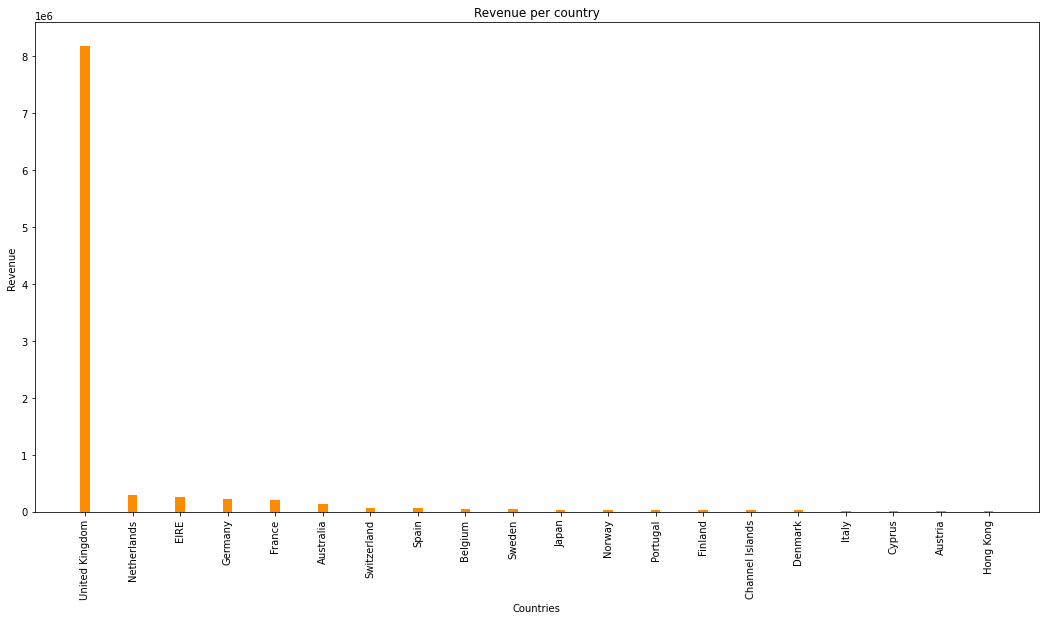

<Figure size 432x288 with 0 Axes>

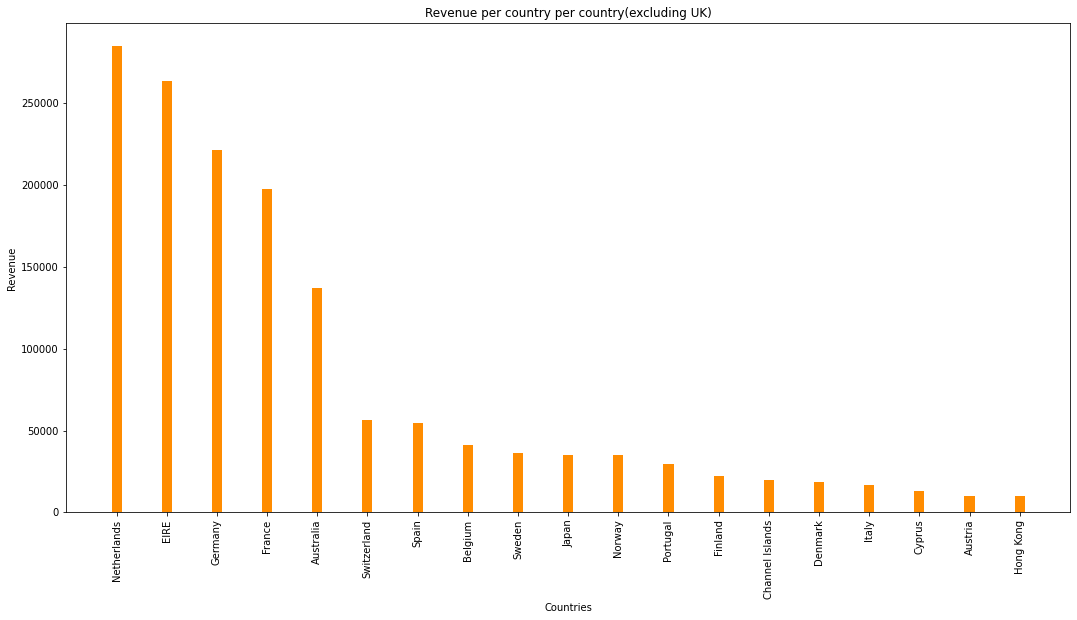

In [ ]:
df4 = df.select(df.Country,df.UnitPrice,df.Quantity).withColumn('TotalBill',(df['UnitPrice']*df['Quantity']))
df4.select(df4.Country,df4.TotalBill).groupBy(df4.Country).agg(sum("TotalBill")).sort(desc("sum(TotalBill)")).limit(20).show()
df4_pandas_x = df4.select(df4.Country,df4.TotalBill).groupBy(df4.Country).agg(sum("TotalBill")).sort(desc("sum(TotalBill)")).limit(20).toPandas()["Country"].values.tolist()
df4_pandas_y = df4.select(df4.Country,df4.TotalBill).groupBy(df4.Country).agg(sum("TotalBill")).sort(desc("sum(TotalBill)")).limit(20).toPandas()["sum(TotalBill)"].values.tolist()


#Visualisng the PySpark dataframe
fig = plt.figure(figsize = (18, 9))   
# creating the bar plot 
plt.bar(df4_pandas_x, df4_pandas_y, color ='darkorange',  width = 0.2)   
plt.xlabel("Countries") 
plt.xticks(rotation=90)

plt.ylabel("Revenue") 
plt.title("Revenue per country") 
plt.show() 
plt.savefig('query4a.png', dpi=300, bbox_inches='tight')


del(df4_pandas_x[0])
del(df4_pandas_y[0])

#Visualisng the PySpark dataframe
fig = plt.figure(figsize = (18, 9))   
# creating the bar plot 
plt.bar(df4_pandas_x, df4_pandas_y,  width = 0.2, color='darkorange')   
plt.xlabel("Countries") 
plt.xticks(rotation=90)
plt.ylabel("Revenue") 
plt.title("Revenue per country per country(excluding UK)") 
plt.show() 


# **Query 5: What are the top 20 products (in terms of revenue earned for the company)?**

+--------------------+------------------+
|         Description|    sum(TotalBill)|
+--------------------+------------------+
|      DOTCOM POSTAGE|206245.48000000007|
|REGENCY CAKESTAND...| 164762.1899999997|
|WHITE HANGING HEA...|  99668.4699999996|
|       PARTY BUNTING| 98302.98000000023|
|JUMBO BAG RED RET...| 92356.03000000058|
|  RABBIT NIGHT LIGHT| 66756.59000000019|
|             POSTAGE|          66230.64|
|PAPER CHAIN KIT 5...|63791.939999999944|
|ASSORTED COLOUR B...| 58959.73000000042|
|       CHILLI LIGHTS| 53768.05999999991|
|      SPOTTY BUNTING|42065.320000000094|
|JUMBO BAG PINK PO...| 41619.65999999982|
|BLACK RECORD COVE...| 40596.96000000001|
|PICNIC BASKET WIC...|           39619.5|
|SET OF 3 CAKE TIN...| 37413.44000000016|
|DOORMAT KEEP CALM...| 36565.38999999998|
|JAM MAKING SET WI...| 36116.09000000008|
|WOOD BLACK BOARD ...| 35859.27000000004|
|LUNCH BAG RED RET...| 34897.30999999998|
|      POPCORN HOLDER| 33969.46000000002|
+--------------------+------------

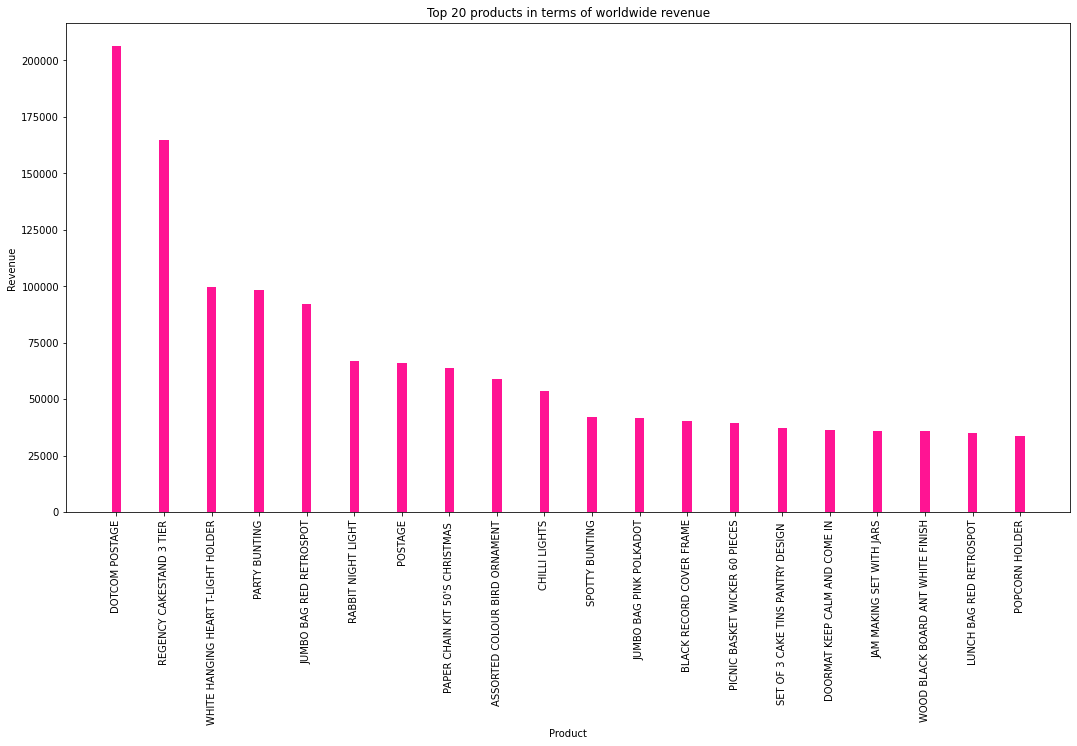

In [ ]:
df5 = df.select(df.Description,df.UnitPrice,df.Quantity).withColumn('TotalBill',(df['UnitPrice']*df['Quantity']))
df5.select(df5.Description,df5.TotalBill).groupBy(df5.Description).agg(sum("TotalBill")).sort(desc("sum(TotalBill)")).show()
df5_pandas_x=df5.select(df5.Description,df5.TotalBill).groupBy(df5.Description).agg(sum("TotalBill")).sort(desc("sum(TotalBill)")).limit(20).toPandas()["Description"].values.tolist()
df5_pandas_y=df5.select(df5.Description,df5.TotalBill).groupBy(df5.Description).agg(sum("TotalBill")).sort(desc("sum(TotalBill)")).limit(20).toPandas()["sum(TotalBill)"].values.tolist()


fig = plt.figure(figsize = (18, 9))   
# creating the bar plot 
plt.bar(df5_pandas_x, df5_pandas_y,  width = 0.2, color='deeppink')   
plt.xlabel("Product") 
plt.xticks(rotation=90)
plt.ylabel("Revenue") 
plt.title("Top 20 products in terms of worldwide revenue") 
plt.show() 


# **Query 6 :What is the Quarter wise revenue breakdown?**

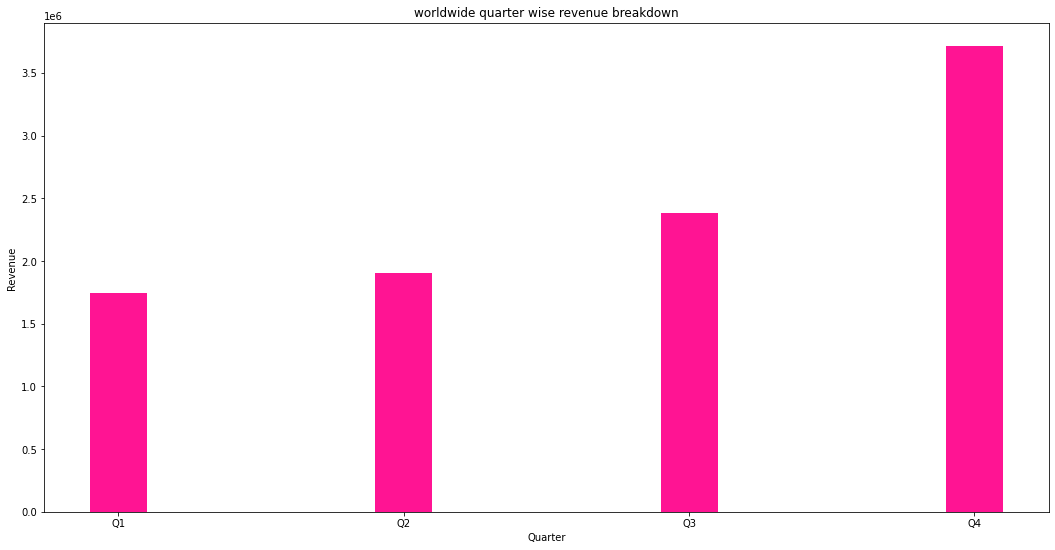

In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType
from functools import reduce  # For Python 3.x
from pyspark.sql import DataFrame

def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)



df6 = df.select(df.InvoiceDate,df.UnitPrice,df.Quantity).withColumn('TotalRevenue',(df['UnitPrice']*df['Quantity']))
month_col = split(df6['InvoiceDate'], '/')
df6 = df6.withColumn('month_col',month_col.getItem(0))
df6 = df6.select(df6.month_col,df6.TotalRevenue).groupBy(df6.month_col).agg(sum('TotalRevenue')).withColumn("month_col",df6["month_col"].cast(IntegerType())).sort("month_col")

df6_q1 = df6.filter((df6.month_col >=1) & (df6.month_col<=3)).withColumn('Quarter', lit('Q1'))
df6_q2 = df6.filter((df6.month_col >=4) & (df6.month_col<=6)).withColumn('Quarter', lit('Q2'))
df6_q3 = df6.filter((df6.month_col >=7) & (df6.month_col<=9)).withColumn('Quarter', lit('Q3'))
df6_q4 = df6.filter((df6.month_col >=10) & (df6.month_col<=12)).withColumn('Quarter', lit('Q4'))
df6 = unionAll(df6_q1,df6_q2,df6_q3,df6_q4)
df6 = df6.withColumnRenamed("sum(TotalRevenue)","Revenue")

df6 = df6.select(df6.Quarter,df6.Revenue).groupBy(df6.Quarter).agg(sum('Revenue')).sort(df6.Quarter)
df6 = df6.withColumnRenamed("sum(Revenue)","Revenue")

df6_pandas_x=df6.toPandas()["Quarter"].values.tolist()
df6_pandas_y=df6.toPandas()["Revenue"].values.tolist()


fig = plt.figure(figsize = (18, 9))   
# creating the bar plot 
plt.bar(df6_pandas_x, df6_pandas_y,  width = 0.2, color='deeppink')   
plt.xlabel("Quarter") 
plt.ylabel("Revenue")
plt.title("worldwide quarter wise revenue breakdown")
plt.show()



# **Query 7 : What is the Quarter wise revenue in the country of Germany?**

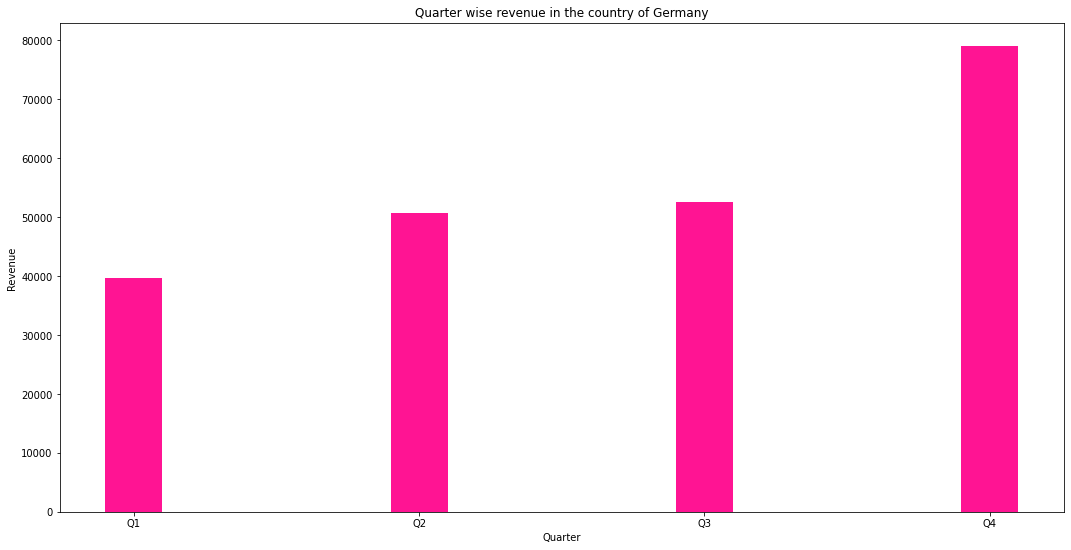

In [ ]:
df7 = df.select(df.InvoiceDate,df.UnitPrice,df.Quantity,df.Country).withColumn('TotalRevenue',(df['UnitPrice']*df['Quantity']))
df7 = df7.filter(df.Country == 'Germany')
month_col = split(df7['InvoiceDate'], '/')
df7 = df7.withColumn('month_col',month_col.getItem(0))
df7 = df7.select(df7.month_col,df7.TotalRevenue).groupBy(df7.month_col).agg(sum('TotalRevenue')).withColumn("month_col",df7["month_col"].cast(IntegerType())).sort("month_col")

df7_q1 = df7.filter((df7.month_col >=1) & (df7.month_col<=3)).withColumn('Quarter', lit('Q1'))
df7_q2 = df7.filter((df7.month_col >=4) & (df7.month_col<=6)).withColumn('Quarter', lit('Q2'))
df7_q3 = df7.filter((df7.month_col >=7) & (df7.month_col<=9)).withColumn('Quarter', lit('Q3'))
df7_q4 = df7.filter((df7.month_col >=10) & (df7.month_col<=12)).withColumn('Quarter', lit('Q4'))
df7 = unionAll(df7_q1,df7_q2,df7_q3,df7_q4)
df7 = df7.withColumnRenamed("sum(TotalRevenue)","Revenue")

df7 = df7.select(df7.Quarter,df7.Revenue).groupBy(df7.Quarter).agg(sum('Revenue')).sort(df7.Quarter)
df7 = df7.withColumnRenamed("sum(Revenue)","Revenue")

df7_pandas_x=df7.toPandas()["Quarter"].values.tolist()
df7_pandas_y=df7.toPandas()["Revenue"].values.tolist()


fig = plt.figure(figsize = (18, 9))   
# creating the bar plot 
plt.bar(df7_pandas_x, df7_pandas_y,  width = 0.2, color='deeppink')   
plt.xlabel("Quarter") 
plt.ylabel("Revenue")
plt.title("Quarter wise revenue in the country of Germany")
plt.show()



# **Query 8 :What is the Quarter wise revenue of Product "DOTCOM POSTAGE" in the country of United kingdom ?**

+---------------+---------+--------+--------------+--------------------+------------------+
|    InvoiceDate|UnitPrice|Quantity|       Country|         Description|      TotalRevenue|
+---------------+---------+--------+--------------+--------------------+------------------+
| 12/1/2010 8:26|     2.55|       6|United Kingdom|WHITE HANGING HEA...|15.299999999999999|
| 12/1/2010 9:02|     2.55|       6|United Kingdom|WHITE HANGING HEA...|15.299999999999999|
| 12/1/2010 9:32|     2.55|       6|United Kingdom|WHITE HANGING HEA...|15.299999999999999|
|12/1/2010 10:19|     2.55|      64|United Kingdom|WHITE HANGING HEA...|             163.2|
|12/1/2010 10:39|     2.55|      32|United Kingdom|WHITE HANGING HEA...|              81.6|
|12/1/2010 10:51|     2.55|       6|United Kingdom|WHITE HANGING HEA...|15.299999999999999|
|12/1/2010 11:21|     2.95|       4|United Kingdom|WHITE HANGING HEA...|              11.8|
|12/1/2010 11:33|     2.55|       8|United Kingdom|WHITE HANGING HEA...|        

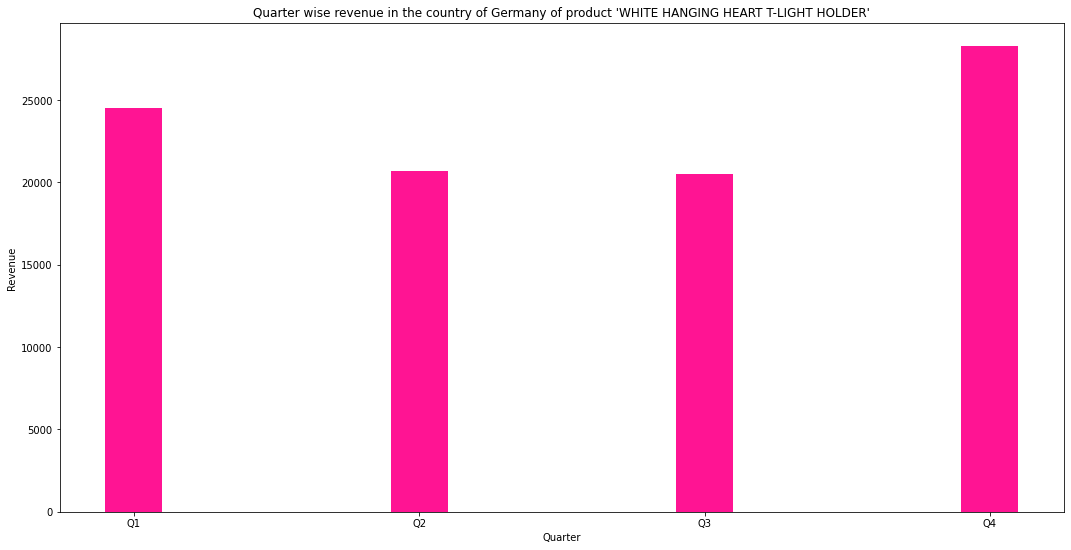

In [ ]:
df8 = df.select(df.InvoiceDate,df.UnitPrice,df.Quantity,df.Country,df.Description).withColumn('TotalRevenue',(df['UnitPrice']*df['Quantity']))
df8 = df8.filter(df.Country == 'United Kingdom')
df8 = df8.filter(df.Description == 'WHITE HANGING HEART T-LIGHT HOLDER')
df8.show()
month_col = split(df8['InvoiceDate'], '/')
df8 = df8.withColumn('month_col',month_col.getItem(0))
df8 = df8.select(df8.month_col,df8.TotalRevenue).groupBy(df8.month_col).agg(sum('TotalRevenue')).withColumn("month_col",df8["month_col"].cast(IntegerType())).sort("month_col")

df8_q1 = df8.filter((df8.month_col >=1) & (df8.month_col<=3)).withColumn('Quarter', lit('Q1'))
df8_q2 = df8.filter((df8.month_col >=4) & (df8.month_col<=6)).withColumn('Quarter', lit('Q2'))
df8_q3 = df8.filter((df8.month_col >=7) & (df8.month_col<=9)).withColumn('Quarter', lit('Q3'))
df8_q4 = df8.filter((df8.month_col >=10) & (df8.month_col<=12)).withColumn('Quarter', lit('Q4'))
df8 = unionAll(df8_q1,df8_q2,df8_q3,df8_q4)
df8 = df8.withColumnRenamed("sum(TotalRevenue)","Revenue")

df8 = df8.select(df8.Quarter,df8.Revenue).groupBy(df8.Quarter).agg(sum('Revenue')).sort(df8.Quarter)
df8 = df8.withColumnRenamed("sum(Revenue)","Revenue")
df8.show()

df8_pandas_x=df8.toPandas()["Quarter"].values.tolist()
df8_pandas_y=df8.toPandas()["Revenue"].values.tolist()


fig = plt.figure(figsize = (18, 9))   
# creating the bar plot 
plt.bar(df8_pandas_x, df8_pandas_y,  width = 0.2, color='deeppink')   
plt.xlabel("Quarter") 
plt.ylabel("Revenue")
plt.title("Quarter wise revenue in the country of Germany of product 'WHITE HANGING HEART T-LIGHT HOLDER'")
plt.show()


# **Query 9 : What is the quarter wise worldwide revenue from a product?**

+---------------+---------+--------+--------------+--------------------+------------------+
|    InvoiceDate|UnitPrice|Quantity|       Country|         Description|      TotalRevenue|
+---------------+---------+--------+--------------+--------------------+------------------+
| 12/1/2010 8:26|     2.55|       6|United Kingdom|WHITE HANGING HEA...|15.299999999999999|
| 12/1/2010 9:02|     2.55|       6|United Kingdom|WHITE HANGING HEA...|15.299999999999999|
| 12/1/2010 9:32|     2.55|       6|United Kingdom|WHITE HANGING HEA...|15.299999999999999|
|12/1/2010 10:19|     2.55|      64|United Kingdom|WHITE HANGING HEA...|             163.2|
|12/1/2010 10:39|     2.55|      32|United Kingdom|WHITE HANGING HEA...|              81.6|
|12/1/2010 10:51|     2.55|       6|United Kingdom|WHITE HANGING HEA...|15.299999999999999|
|12/1/2010 11:21|     2.95|       4|United Kingdom|WHITE HANGING HEA...|              11.8|
|12/1/2010 11:33|     2.55|       8|United Kingdom|WHITE HANGING HEA...|        

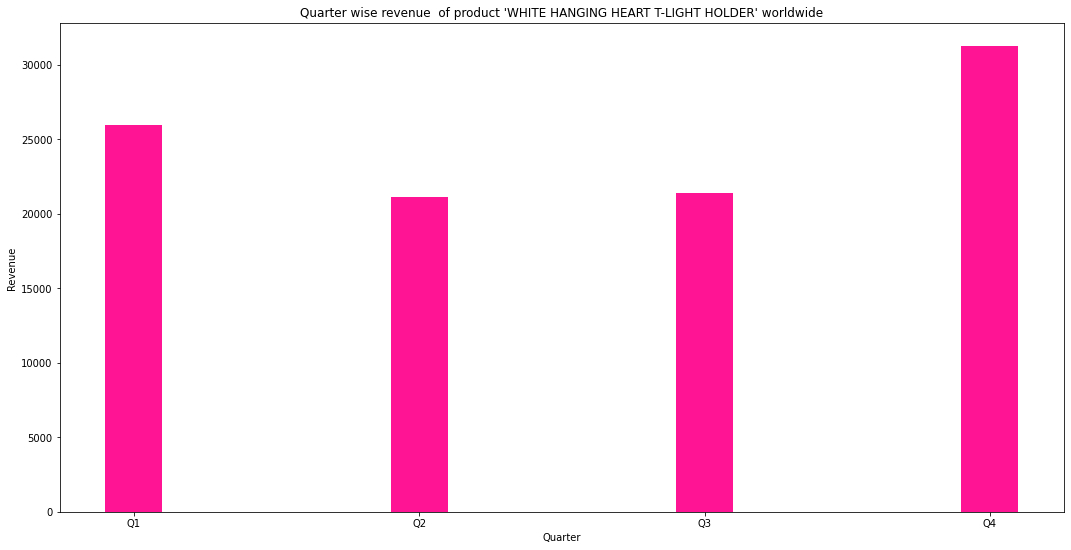

In [ ]:
df9 = df.select(df.InvoiceDate,df.UnitPrice,df.Quantity,df.Country,df.Description).withColumn('TotalRevenue',(df['UnitPrice']*df['Quantity']))
df9 = df9.filter(df.Description == 'WHITE HANGING HEART T-LIGHT HOLDER')
df9.show()
month_col = split(df9['InvoiceDate'], '/')
df9 = df9.withColumn('month_col',month_col.getItem(0))
df9 = df9.select(df9.month_col,df9.TotalRevenue).groupBy(df9.month_col).agg(sum('TotalRevenue')).withColumn("month_col",df9["month_col"].cast(IntegerType())).sort("month_col")

df9_q1 = df9.filter((df9.month_col >=1) & (df9.month_col<=3)).withColumn('Quarter', lit('Q1'))
df9_q2 = df9.filter((df9.month_col >=4) & (df9.month_col<=6)).withColumn('Quarter', lit('Q2'))
df9_q3 = df9.filter((df9.month_col >=7) & (df9.month_col<=9)).withColumn('Quarter', lit('Q3'))
df9_q4 = df9.filter((df9.month_col >=10) & (df9.month_col<=12)).withColumn('Quarter', lit('Q4'))
df9 = unionAll(df9_q1,df9_q2,df9_q3,df9_q4)
df9 = df9.withColumnRenamed("sum(TotalRevenue)","Revenue")

df9 = df9.select(df9.Quarter,df9.Revenue).groupBy(df9.Quarter).agg(sum('Revenue')).sort(df9.Quarter)
df9 = df9.withColumnRenamed("sum(Revenue)","Revenue")
df9.show()

df9_pandas_x=df9.toPandas()["Quarter"].values.tolist()
df9_pandas_y=df9.toPandas()["Revenue"].values.tolist()


fig = plt.figure(figsize = (18, 9))   
# creating the bar plot 
plt.bar(df9_pandas_x, df9_pandas_y,  width = 0.2, color='deeppink')   
plt.xlabel("Quarter") 
plt.ylabel("Revenue")
plt.title("Quarter wise revenue  of product 'WHITE HANGING HEART T-LIGHT HOLDER' worldwide")
plt.show()


# **Query 10 : What are the top 10 selling products in the country of Germany?**

+--------------------+------------------+
|         Description|           Revenue|
+--------------------+------------------+
|             POSTAGE|           20821.0|
|REGENCY CAKESTAND...| 8257.349999999999|
|ROUND SNACK BOXES...|3554.7000000000016|
|ROUND SNACK BOXES...|1949.9500000000005|
| SPACEBOY LUNCH BOX |1629.4499999999994|
|PLASTERS IN TIN W...|1389.2999999999997|
|  RED KITCHEN SCALES|1290.3000000000002|
|6 RIBBONS RUSTIC ...|            1288.8|
|PLASTERS IN TIN C...|1234.1999999999998|
|   GUMBALL COAT RACK|            1216.2|
+--------------------+------------------+

root
 |-- Description: string (nullable = true)
 |-- Revenue: double (nullable = true)



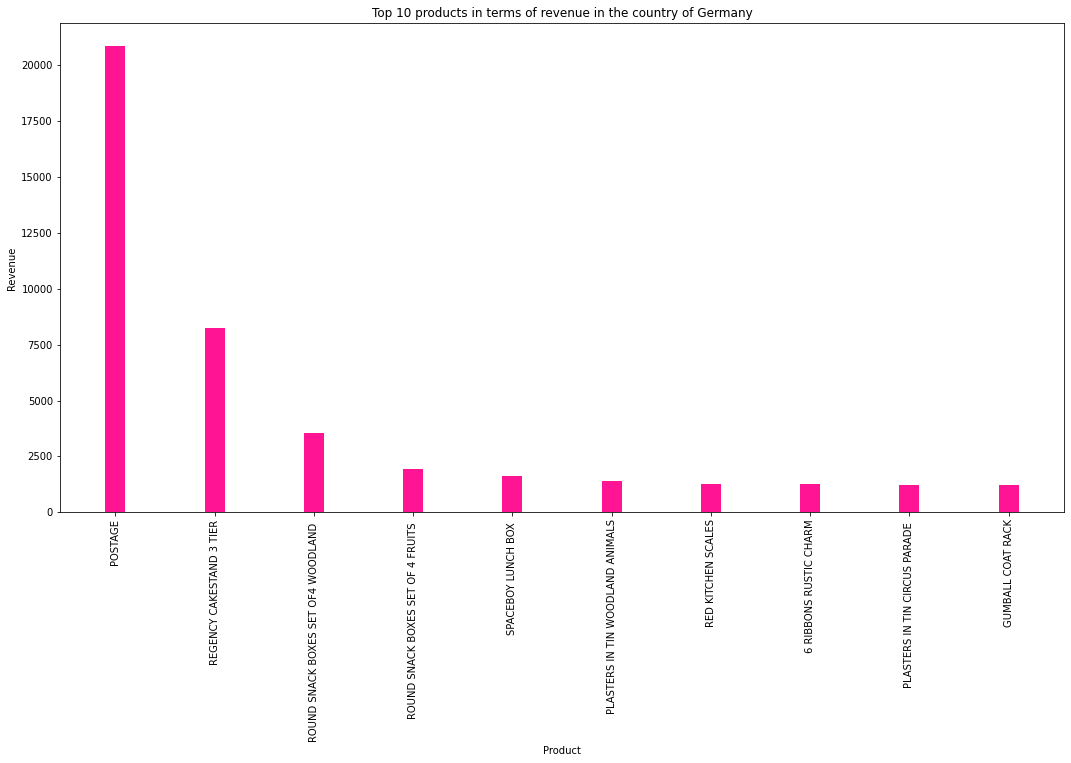

In [ ]:
df10 = df.select(df.Description,df.UnitPrice,df.Quantity,df.Country).withColumn('TotalBill',(df['UnitPrice']*df['Quantity']))
df10 = df10.filter(df10.Country == "Germany")
df10 = df10.select(df10.Description,df10.TotalBill).groupBy(df10.Description).agg(sum("TotalBill")).sort(desc("sum(TotalBill)")).limit(10)
df10 = df10.withColumnRenamed("sum(TotalBill)","Revenue")
df10.show()
df10.printSchema()

df10_pandas_x=df10.select(df10.Description,df10.Revenue).groupBy(df10.Description).agg(sum(df10.Revenue)).sort(desc("sum(Revenue)")).limit(10).toPandas()["Description"].values.tolist()
df10_pandas_y=df10.select(df10.Description,df10.Revenue).groupBy(df10.Description).agg(sum(df10.Revenue)).sort(desc("sum(Revenue)")).limit(10).toPandas()["sum(Revenue)"].values.tolist()



fig = plt.figure(figsize = (18, 9))   
# creating the bar plot 
plt.bar(df10_pandas_x, df10_pandas_y,  width = 0.2, color='deeppink')   
plt.xlabel("Product") 
plt.xticks(rotation=90)
plt.ylabel("Revenue") 
plt.title("Top 10 products in terms of revenue in the country of Germany") 
plt.show() 
